# Explatory Data Analysis (EDA)

hal yang perlu diperhatikan adalah,
- Target
- Numeric vs Target
- Cateforig vs Target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

In [2]:
# import data dan drop kolom

df = pd.read_csv("titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

### Target

In [3]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Numeric VS Target

C:\Users\user\AppData\Local\Temp\ipykernel_11452\759539292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], bins = [0,5,12,18,40,120], color="r", label="not survived")
C:\Users\user\AppData\Local\Temp\ipykernel_11452\759539292.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

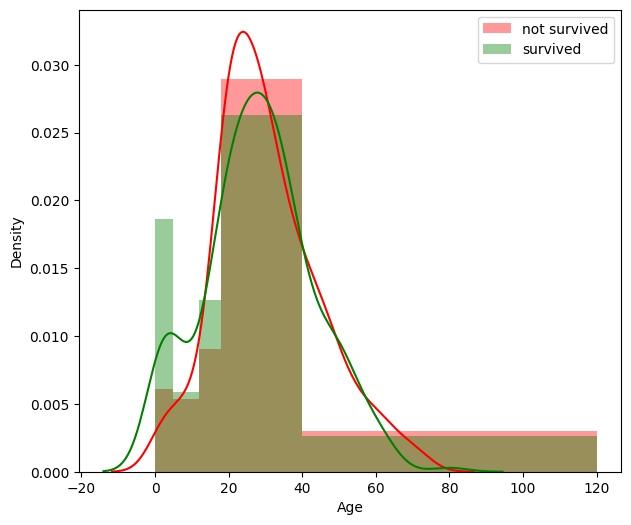

In [4]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived == 0], bins = [0,5,12,18,40,120], color="r", label="not survived")
sns.distplot(df.Age[df.Survived == 1], bins = [0,5,12,18,40,120], color="g", label="survived")
plt.legend();

C:\Users\user\AppData\Local\Temp\ipykernel_11452\1312906599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0], bins = 25, color="r", label="not survived")
C:\Users\user\AppData\Local\Temp\ipykernel_11452\1312906599.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

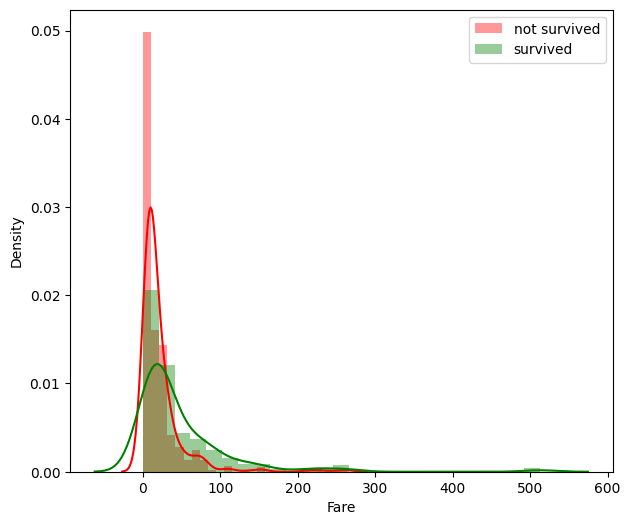

In [5]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived == 0], bins = 25, color="r", label="not survived")
sns.distplot(df.Fare[df.Survived == 1], bins = 25, color="g", label="survived")
plt.legend();

<Axes: xlabel='Pclass', ylabel='count'>

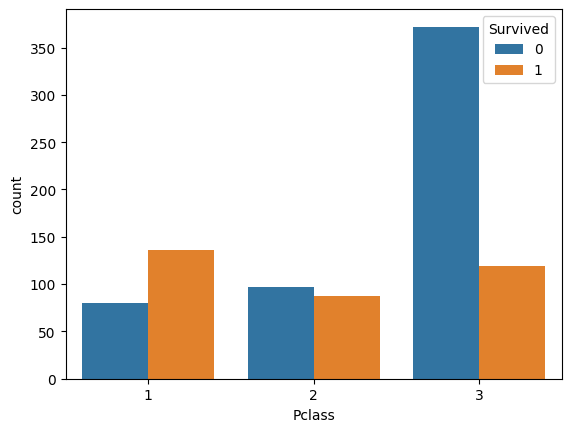

In [6]:
cat_var=["Pclass", "Sex", "Parch", "SibSp", "Embarked"]
sns.countplot(data=df, x="Pclass", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

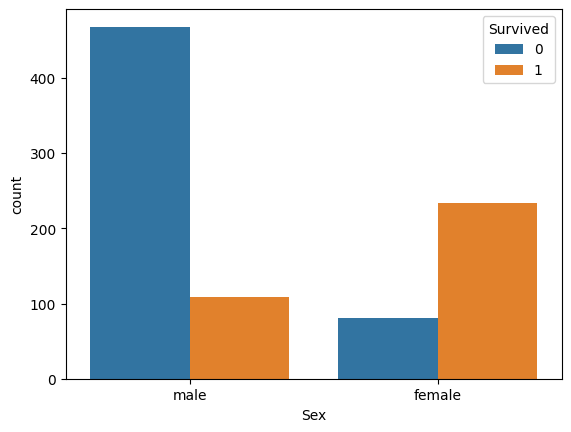

In [7]:
cat_var=["Pclass", "Sex", "Parch", "SibSp", "Embarked"]
sns.countplot(data=df, x="Sex", hue="Survived")

TypeError: countplot() got multiple values for argument 'data'

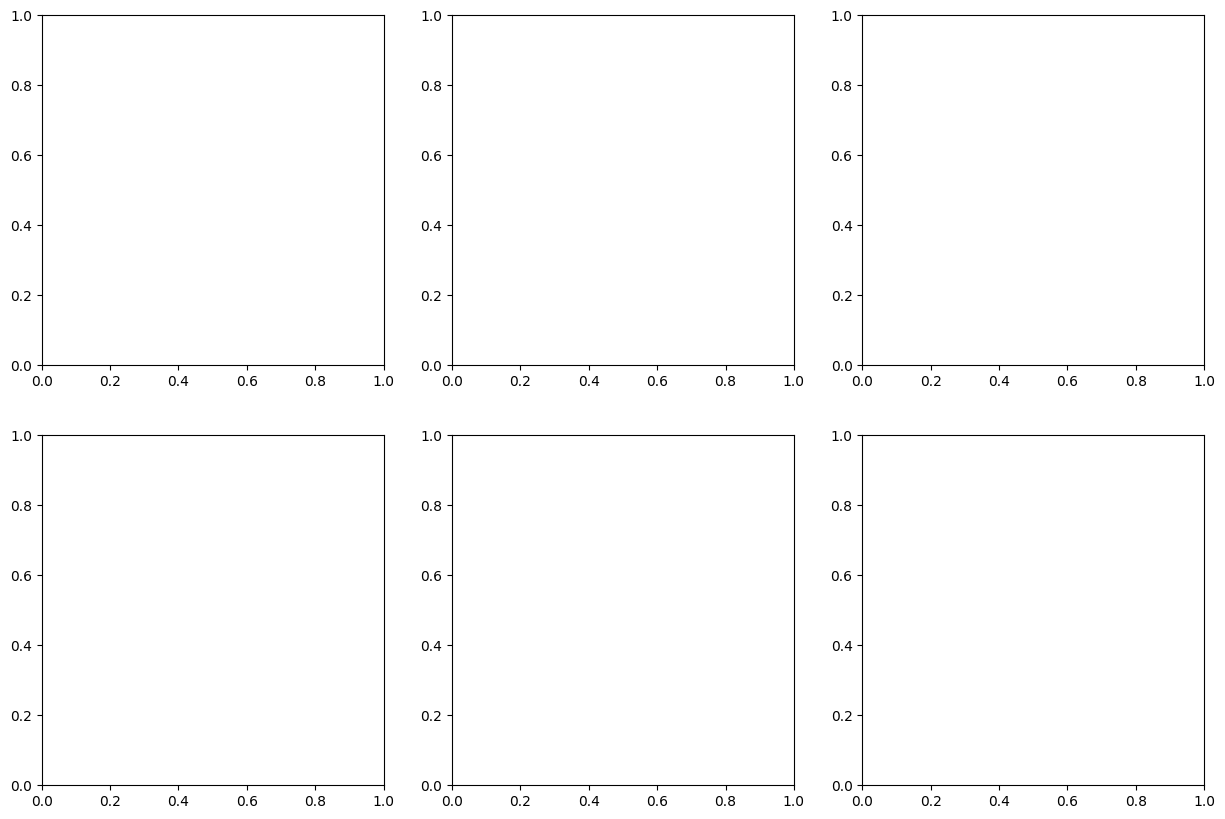

In [8]:
cat_var=["Pclass", "Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2,3,figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Survived", ax=ax)

### Pandas Crosstab (Optional)

In [ ]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
pd.crosstab(df.Pclass, df.Survived, normalize='index') # in presentage

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


# Feature Engineering

### Adding Feature => isAlone

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df["isAlone"]=(df.Parch==0) & (df.SibSp)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,True
2,1,1,female,38.0,1,0,71.2833,C,True
3,1,3,female,26.0,0,0,7.9250,S,False
4,1,1,female,35.0,1,0,53.1000,S,True
5,0,3,male,35.0,0,0,8.0500,S,False


In [ ]:
df.Age = pd.cut(df.Age, [0,5,12,18,40,120], labels=["Balita", "Anak-anak", "Remaja", "dewasa", "Lansia"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S
2,1,1,female,dewasa,1,0,71.2833,C
3,1,3,female,dewasa,0,0,7.9250,S
4,1,1,female,dewasa,1,0,53.1000,S
5,0,3,male,dewasa,0,0,8.0500,S


In [ ]:
df.Fare = pd.cut(df.Fare, [0,25,100,600], labels=["murah", "mahal","eksekutif"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S
2,1,1,female,dewasa,1,0,mahal,C
3,1,3,female,dewasa,0,0,murah,S
4,1,1,female,dewasa,1,0,mahal,S
5,0,3,male,dewasa,0,0,murah,S


### Menggunakan JCopML untuk preprocessing dan parameter gridsearchcv

In [14]:
# Database splitting
X= df.drop(columns="Survived")
y=df.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [10]:
# Preprocessor
from jcopml.pipeline import num_pipe, cat_pipe

preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='minmax'),["SibSp", "Parch","Fare"]),
    ("categoric", cat_pipe(encoder='onehot'),["Pclass", "Sex","Embarked"])
])

In [12]:
from jcopml.tuning import grid_search_params as gsp
gsp.knn_params

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [15]:
#Pipeline
pipeline = Pipeline([
    ("prep", preprocessor),
("algo", KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose= 1)
model.fit(X_train, y_train) #paremeternya pake yg sudah ada di jcopml

model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


(0.8174157303370787, 0.7821229050279329)

In [17]:
from luwiji.knn import illustration

# Always start with simple model

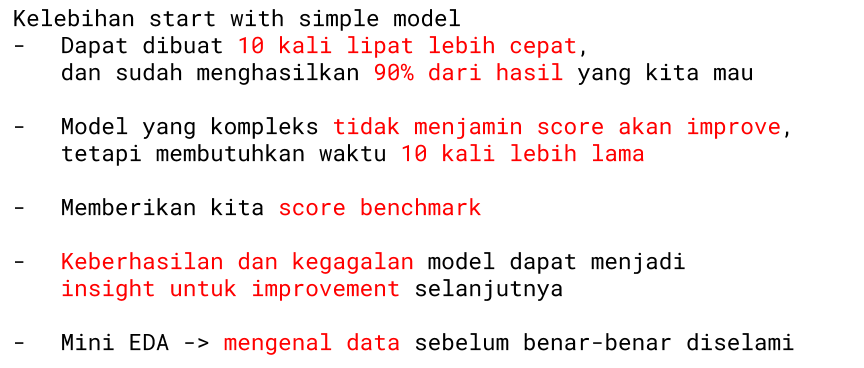

In [18]:
illustration.simple_model_advantage